In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# generates the latitudes and longitudes, but first, they need to be stored 
# Declare and store in array var
# pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# zip object packs each pair of lats and lngs having the same index in their respective array into a tuple


In [10]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [11]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [12]:
# unpack our lat_lngs zip object into a list.
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

# 1.Import Dependencies, and Initialize an Empty List and Counters

In [14]:
# Import dependancies forr required module 
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# 2.Loop Through the List of Cities and Build the City URL

In [18]:
#  iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50
# Loop through all the cities in our list.
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]   

In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 40 of Set 23 | port ellen
City not found. Skipping...
Processing Record 41 of Set 23 | faanui
Processing Record 42 of Set 23 | punta arenas
Processing Record 43 of Set 23 | vaini
Processing Record 44 of Set 23 | ipixuna
Processing Record 45 of Set 23 | opunake
Processing Record 46 of Set 23 | marica
Processing Record 47 of Set 23 | busselton
Processing Record 48 of Set 23 | bredasdorp
Processing Record 49 of Set 23 | caravelas
Processing Record 50 of Set 23 | hithadhoo
Processing Record 51 of Set 23 | parabel
Processing Record 52 of Set 23 | thunder bay
Processing Record 53 of Set 23 | rikitea
Processing Record 54 of Set 23 | lorengau
Processing Record 55 of Set 23 | saint anthony
Processing Record 56 of Set 23 | tsihombe
City not found. Skipping...
Processing Record 57 of Set 23 | albany
Processing Record 58 of Set 23 | port elizabeth
Processing Record 59 of Set 23 | paamiut
Processing Record 60 of Set 23 | nabul
City not found. Skipping...
Processing Record 61 of Se

Processing Record 31 of Set 26 | saint-pierre
Processing Record 32 of Set 26 | zhuhai
Processing Record 33 of Set 26 | quelimane
Processing Record 34 of Set 26 | jiuquan
Processing Record 35 of Set 26 | oranjemund
Processing Record 36 of Set 26 | paracuru
Processing Record 37 of Set 26 | norman wells
Processing Record 38 of Set 26 | zempoala
Processing Record 39 of Set 26 | yian
City not found. Skipping...
Processing Record 40 of Set 26 | talnakh
Processing Record 41 of Set 26 | east london
Processing Record 42 of Set 26 | chokurdakh
Processing Record 43 of Set 26 | mahebourg
Processing Record 44 of Set 26 | lasa
Processing Record 45 of Set 26 | qaanaaq
Processing Record 46 of Set 26 | codrington
Processing Record 47 of Set 26 | kalinino
Processing Record 48 of Set 26 | bonthe
Processing Record 49 of Set 26 | vajszlo
Processing Record 50 of Set 26 | samokov
Processing Record 1 of Set 27 | severo-yeniseyskiy
Processing Record 2 of Set 27 | rawannawi
City not found. Skipping...
Processin

Processing Record 16 of Set 30 | sakaiminato
Processing Record 17 of Set 30 | bambous virieux
Processing Record 18 of Set 30 | shimoda
Processing Record 19 of Set 30 | lompoc
Processing Record 20 of Set 30 | mount isa
Processing Record 21 of Set 30 | naantali
Processing Record 22 of Set 30 | san jeronimo
Processing Record 23 of Set 30 | andevoranto
City not found. Skipping...
Processing Record 24 of Set 30 | moerai
Processing Record 25 of Set 30 | chanthaburi
Processing Record 26 of Set 30 | kudahuvadhoo
Processing Record 27 of Set 30 | boyolangu
Processing Record 28 of Set 30 | tutoia
Processing Record 29 of Set 30 | forrest city
Processing Record 30 of Set 30 | tessalit
Processing Record 31 of Set 30 | teguldet
Processing Record 32 of Set 30 | asosa
Processing Record 33 of Set 30 | morgantown
Processing Record 34 of Set 30 | quatre cocos
Processing Record 35 of Set 30 | karkaralinsk
City not found. Skipping...
Processing Record 36 of Set 30 | fall river
Processing Record 37 of Set 30

Processing Record 3 of Set 34 | hunza
City not found. Skipping...
Processing Record 4 of Set 34 | banmankhi
Processing Record 5 of Set 34 | surgut
Processing Record 6 of Set 34 | vlotho
Processing Record 7 of Set 34 | neuquen
Processing Record 8 of Set 34 | geresk
City not found. Skipping...
Processing Record 9 of Set 34 | dukat
Processing Record 10 of Set 34 | druzhba
Processing Record 11 of Set 34 | sao gabriel
Processing Record 12 of Set 34 | krasnokamensk
Processing Record 13 of Set 34 | los llanos de aridane
Processing Record 14 of Set 34 | shubarshi
Processing Record 15 of Set 34 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 34 | deputatskiy
Processing Record 17 of Set 34 | batemans bay
Processing Record 18 of Set 34 | tall kayf
Processing Record 19 of Set 34 | camocim
Processing Record 20 of Set 34 | san cristobal
Processing Record 21 of Set 34 | miri
Processing Record 22 of Set 34 | ferme-neuve
Processing Record 23 of Set 34 | harper
Processing Record 24 o

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,78.80,76,16,21.21,PF,2021-07-20 22:14:23
1,Punta Arenas,-53.1500,-70.9167,35.71,87,0,4.61,CL,2021-07-20 22:11:40
2,Vaini,-21.2000,-175.2000,78.96,89,40,9.22,TO,2021-07-20 22:14:23
3,Ipixuna,-1.7625,-48.8043,75.15,93,74,5.03,BR,2021-07-20 22:14:24
4,Opunake,-39.4556,173.8583,51.33,83,88,15.99,NZ,2021-07-20 22:14:24
5,Marica,-22.9194,-42.8186,64.35,64,66,4.59,BR,2021-07-20 22:14:24
6,Busselton,-33.6500,115.3333,52.09,93,100,11.70,AU,2021-07-20 22:14:25
7,Bredasdorp,-34.5322,20.0403,41.29,87,24,8.81,ZA,2021-07-20 22:14:25
8,Caravelas,-17.7125,-39.2481,71.01,68,100,11.70,BR,2021-07-20 22:14:25
9,Hithadhoo,-0.6000,73.0833,81.01,78,94,9.46,MV,2021-07-20 22:14:25


# Create a DataFrame of City Weather Data

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,78.80,76,16,21.21,PF,2021-07-20 22:14:23
1,Punta Arenas,-53.1500,-70.9167,35.71,87,0,4.61,CL,2021-07-20 22:11:40
2,Vaini,-21.2000,-175.2000,78.96,89,40,9.22,TO,2021-07-20 22:14:23
3,Ipixuna,-1.7625,-48.8043,75.15,93,74,5.03,BR,2021-07-20 22:14:24
4,Opunake,-39.4556,173.8583,51.33,83,88,15.99,NZ,2021-07-20 22:14:24
5,Marica,-22.9194,-42.8186,64.35,64,66,4.59,BR,2021-07-20 22:14:24
6,Busselton,-33.6500,115.3333,52.09,93,100,11.70,AU,2021-07-20 22:14:25
7,Bredasdorp,-34.5322,20.0403,41.29,87,24,8.81,ZA,2021-07-20 22:14:25
8,Caravelas,-17.7125,-39.2481,71.01,68,100,11.70,BR,2021-07-20 22:14:25
9,Hithadhoo,-0.6000,73.0833,81.01,78,94,9.46,MV,2021-07-20 22:14:25


In [26]:
# new_column_order = ["column2", "column4", "column1"] 
new_collumn_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
city_data_df =city_data_df[new_collumn_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2021-07-20 22:14:23,-16.4833,-151.7500,78.80,76,16,21.21
1,Punta Arenas,CL,2021-07-20 22:11:40,-53.1500,-70.9167,35.71,87,0,4.61
2,Vaini,TO,2021-07-20 22:14:23,-21.2000,-175.2000,78.96,89,40,9.22
3,Ipixuna,BR,2021-07-20 22:14:24,-1.7625,-48.8043,75.15,93,74,5.03
4,Opunake,NZ,2021-07-20 22:14:24,-39.4556,173.8583,51.33,83,88,15.99
...,...,...,...,...,...,...,...,...,...
531,Sobolevo,RU,2021-07-20 22:17:16,54.4299,31.8996,61.54,60,100,5.46
532,Miyako,JP,2021-07-20 22:17:16,39.6367,141.9525,77.31,82,66,2.84
533,Payson,US,2021-07-20 22:17:16,40.0444,-111.7321,95.00,28,1,1.99
534,Manoel Urbano,BR,2021-07-20 22:17:17,-8.8389,-69.2597,80.33,52,9,1.01


In [27]:
# weather_data
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot sctter plot 

In [28]:
# we need to get the dataframe to read data what we have in csv 
# import dependancies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import  time 
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Faanui,PF,2021-07-20 22:14:23,-16.4833,-151.7500,78.80,76,16,21.21
1,1,Punta Arenas,CL,2021-07-20 22:11:40,-53.1500,-70.9167,35.71,87,0,4.61
2,2,Vaini,TO,2021-07-20 22:14:23,-21.2000,-175.2000,78.96,89,40,9.22
3,3,Ipixuna,BR,2021-07-20 22:14:24,-1.7625,-48.8043,75.15,93,74,5.03
4,4,Opunake,NZ,2021-07-20 22:14:24,-39.4556,173.8583,51.33,83,88,15.99
5,5,Marica,BR,2021-07-20 22:14:24,-22.9194,-42.8186,64.35,64,66,4.59
6,6,Busselton,AU,2021-07-20 22:14:25,-33.6500,115.3333,52.09,93,100,11.70
7,7,Bredasdorp,ZA,2021-07-20 22:14:25,-34.5322,20.0403,41.29,87,24,8.81
8,8,Caravelas,BR,2021-07-20 22:14:25,-17.7125,-39.2481,71.01,68,100,11.70
9,9,Hithadhoo,MV,2021-07-20 22:14:25,-0.6000,73.0833,81.01,78,94,9.46


In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

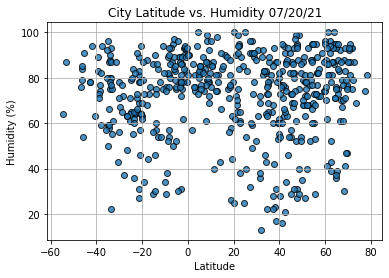

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

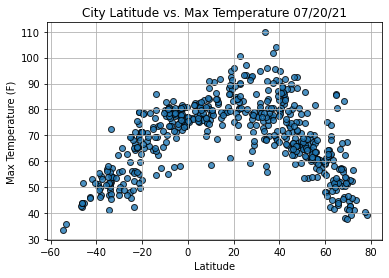

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

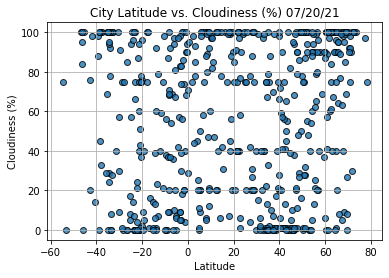

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

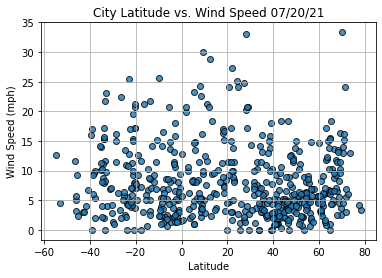

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create Linear Regression Function 

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# to call above function 
# call the function with the correct number of parameters or arguments for the function

# Create the Hemisphere DataFrames

In [39]:
# regression analysis on the maximum temperatures in the Northern and Southern Hemispheres
# create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame
# The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array
# syntax = row = df.loc[row_index]
index13 =city_data_df.loc[13]
index13

City_ID                        13
City                     Lorengau
Country                        PG
Date          2021-07-20 22:14:27
Lat                       -2.0226
Lng                      147.2712
Max Temp                    80.56
Humidity                       78
Cloudiness                    100
Wind Speed                   2.39
Name: 13, dtype: object

In [42]:
# all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head(4)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
10,10,Parabel,RU,2021-07-20 22:14:26,58.6978,81.4825,57.81,91,69,5.53
11,11,Thunder Bay,CA,2021-07-20 22:11:08,48.4001,-89.3168,74.98,40,29,7.29
14,14,Saint Anthony,US,2021-07-20 22:14:27,45.0205,-93.2180,89.92,54,1,1.99
15,15,Albany,US,2021-07-20 22:13:48,42.6001,-73.9662,84.27,76,41,8.19


In [44]:
# all Southern Hemisphere latitudes, for latitudes less than, we can filter the city_data_df DataFrame
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(4)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Faanui,PF,2021-07-20 22:14:23,-16.4833,-151.7500,78.80,76,16,21.21
1,1,Punta Arenas,CL,2021-07-20 22:11:40,-53.1500,-70.9167,35.71,87,0,4.61
2,2,Vaini,TO,2021-07-20 22:14:23,-21.2000,-175.2000,78.96,89,40,9.22
3,3,Ipixuna,BR,2021-07-20 22:14:24,-1.7625,-48.8043,75.15,93,74,5.03


# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

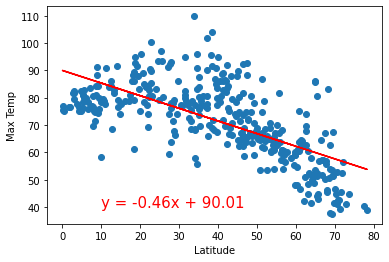

In [45]:
# Call the plot_linear_regression function with the x and y values
# edit title, y-label and x-cordinate
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

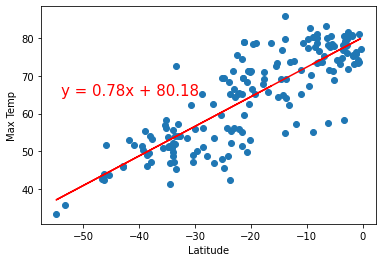

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-54,65))

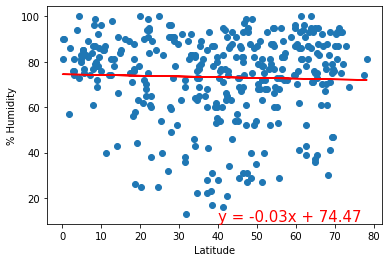

In [63]:
# Linear regression on the Northern Hemisphere humidity 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

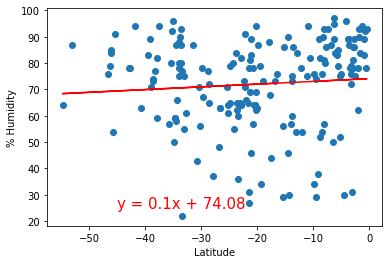

In [68]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-45,25))

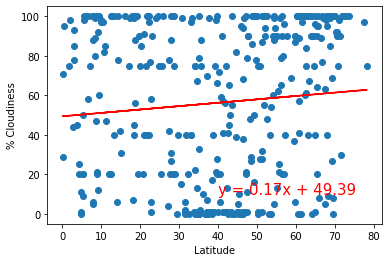

In [69]:
# Linear regression on the Northern Hemisphere cloudiness 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function passing  arguments
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

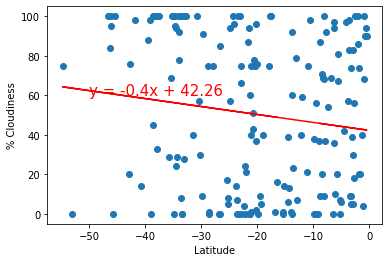

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


# Find the Correlation Between Latitude and Wind Speed


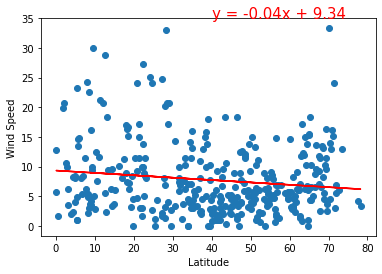

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

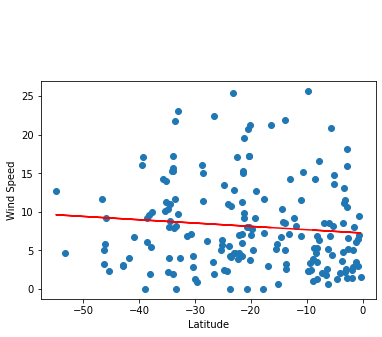

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,35))  ## change this co-ordinate to see the equation